# Python Project – 1: Analyzing Naming Trends using Python
Project: Analyzing the naming trends using Python
Industry: General
Problem Statement:
The dataset is in Zipped format, we have to extract the dataset in the program, visualize the number of
male and female babies born in a particular year, and find out popular baby names.
Description: This project not only focusses on implementing data manipulation and data visualization
using Pandas library, but also tests your ability to deal with real word problem statements.
Dataset: Popular baby names data provided by Social Security Administration (SSA) of United States 

In [ ]:
Hints:
 First, use Pandas, zipfile, and BytesIO library to extract the data. Find out a way to extract only
files that consists useful data.
 Hint: pd.read_csv(BytesIO(z.read(file_name)), encoding='utf-8', engine='python', header=None)
 Then, visualize the number of male and female babies born in a particular year with the help of
pandas.DataFrame.plot, then Analyse baby names by sorting out all birth counts.
 Then, analyse baby names by sorting out top 100 birth counts and group them by names to find
out popular baby names 

In [1]:
import os
os.chdir('C:\\Users\\veena\\OneDrive\\Desktop\\intellipaat assighnment pdf s')

In [2]:
from io import BytesIO
from zipfile import ZipFile
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
z=ZipFile('names.zip').extractall('.')

In [4]:
z

In [5]:
years=[]

for year in range(1880,2021):
    years.append(pd.read_csv(f'yob{year}.txt',names=['Name','Gender','Babies']))
    years[-1]['Year']=year

In [6]:
df=pd.concat(years)
df

,Name,Gender,Babies,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
31448,Zykell,M,5,2020
31449,Zylus,M,5,2020
31450,Zymari,M,5,2020
31451,Zyn,M,5,2020


In [7]:
df_pivot=pd.pivot_table(data=df,index=['Year'],columns=['Gender'],values=['Babies'],aggfunc='sum')
df_pivot

Babies         
Gender        F        M
Year                    
1880      90994   110490
1881      91953   100737
1882     107847   113686
1883     112319   104625
1884     129019   114442
...         ...      ...
2016    1769164  1894723
2017    1723043  1847191
2018    1696917  1811738
2019    1673030  1788414
2020    1609171  1718248

[141 rows x 2 columns]

<AxesSubplot:ylabel='Year'>

<Figure size 720x2160 with 0 Axes>

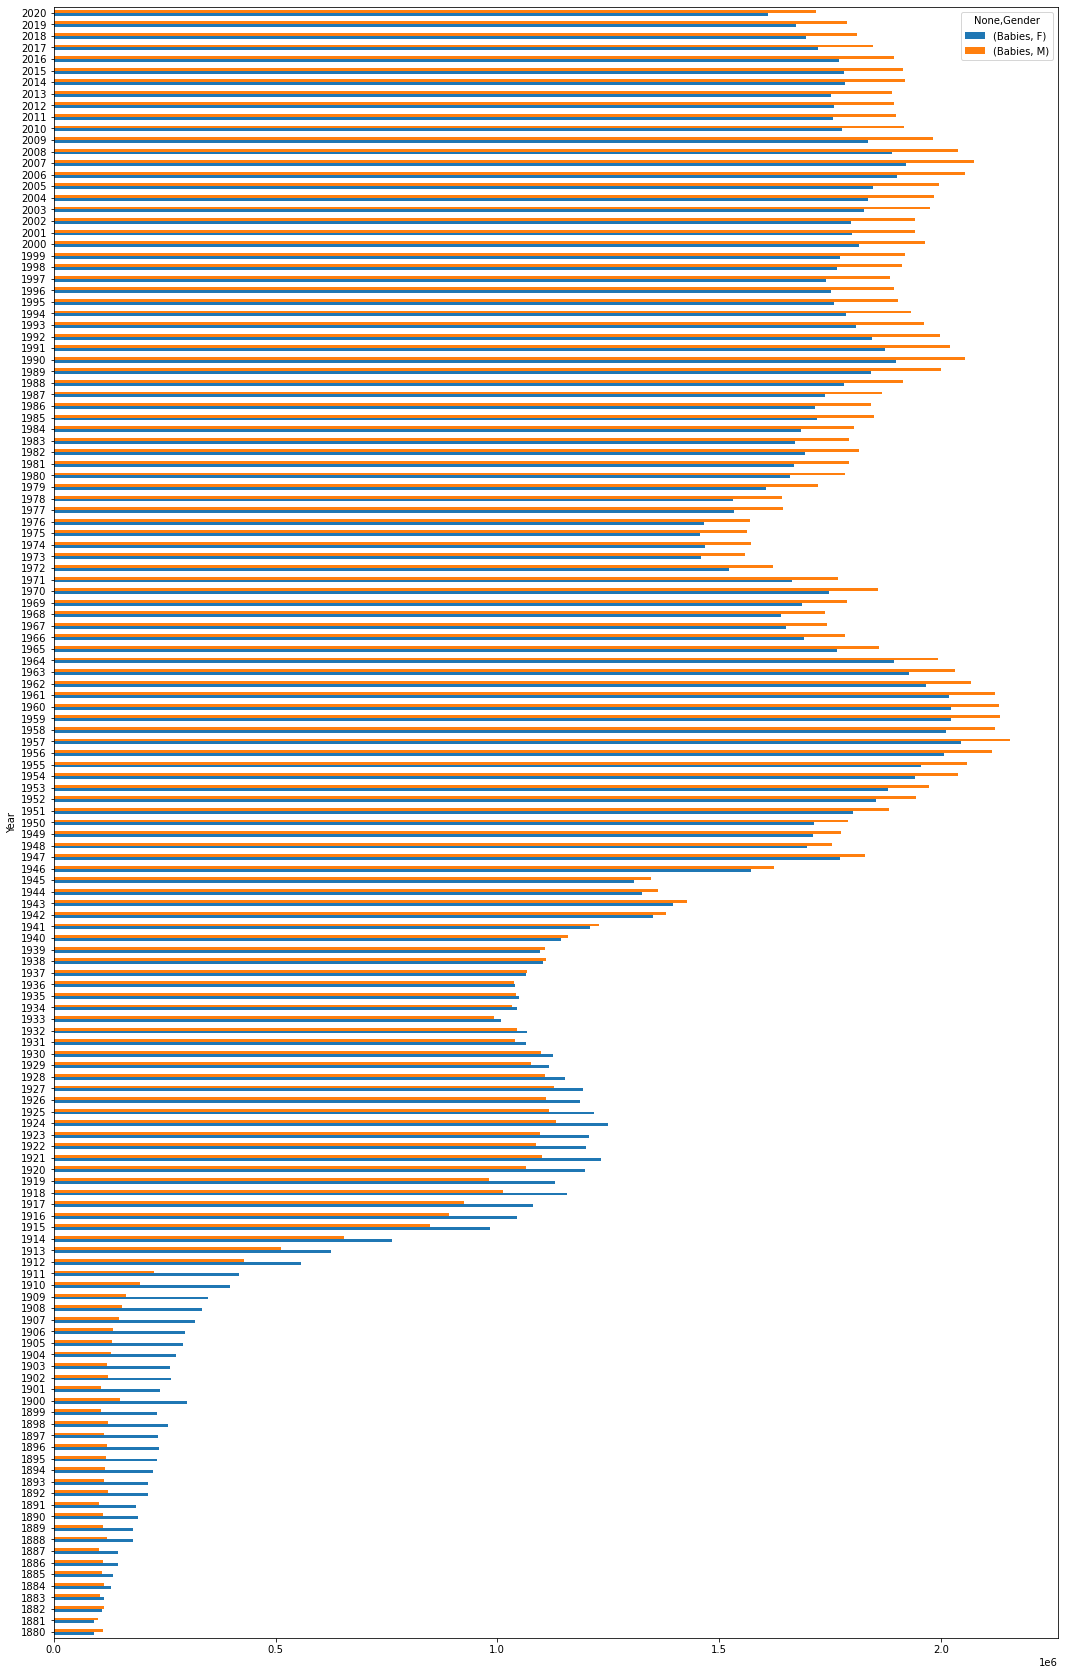

In [8]:
plt.figure(figsize=(10,30)) 
df_pivot.plot(kind='barh',figsize=(18,30),grid=False)

In [10]:
pd.options.display.max_rows=100
sort_baby_names=df.sort_values(by='Babies',ascending=False).reset_index(drop=True)
sort_baby_names.head()

,Name,Gender,Babies,Year
0,Linda,F,99693,1947
1,Linda,F,96212,1948
2,James,M,94762,1947
3,Michael,M,92723,1957
4,Robert,M,91651,1947


In [11]:
df_pivot =pd.pivot_table(data=df,index=['Name'], columns=['Gender','Year'], values=['Babies'], aggfunc='sum')
df_pivot

Babies                                               ...              \
Gender       F                                               ...     M         
Year      1880 1881 1882 1883 1884 1885 1886 1887 1888 1889  ...  2011  2012   
Name                                                         ...               
Aaban      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  11.0  11.0   
Aabha      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
Aabid      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
Aabidah    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
Aabir      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
Zyvion     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
Zyvon      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
Zyyanna    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
Zyyon      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
Zzyzx      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   

                                                     
Gender                                               
Year     2013  2014  2015 2016  2017 2018 2019 2020  
Name                                                 
Aaban    14.0  16.0  15.0  9.0  11.0  7.0  6.0  NaN  
Aabha     NaN   NaN   NaN  NaN   NaN  NaN  NaN  NaN  
Aabid     NaN   NaN   NaN  5.0   NaN  6.0  NaN  NaN  
Aabidah   NaN   NaN   NaN  NaN   NaN  NaN  NaN  NaN  
Aabir     NaN   NaN   NaN  5.0   NaN  5.0  NaN  NaN  
...       ...   ...   ...  ...   ...  ...  ...  ...  
Zyvion    NaN   NaN   NaN  NaN   NaN  NaN  NaN  NaN  
Zyvon     NaN   NaN   7.0  NaN   NaN  NaN  NaN  NaN  
Zyyanna   NaN   NaN   NaN  NaN   NaN  NaN  NaN  NaN  
Zyyon     NaN   6.0   NaN  NaN   NaN  NaN  NaN  NaN  
Zzyzx     NaN   NaN   NaN  NaN   NaN  5.0  NaN  NaN  

[100400 rows x 282 columns]

In [12]:
top_100_names=sort_baby_names.head(100)
grouped_names=top_100_names[['Name','Babies']].groupby('Name').sum().sort_values(by='Babies',ascending=False)
grouped_names

,Babies
Name,
James,1808548
Michael,1768250
John,1525027
Robert,1467437
David,978084
Linda,441332
Mary,219697
